In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import probplot

## 2021년 국민건강보험공단_건강검진정보
- 기준년도
- 가입자 일련번호
- 시도코드
- 성별코드: 남성1, 여성2
- 연령대코드
- 흡연상태: 피우지 않는다 1, 이전에 피웠으나 끊었다 2, 현재도 피우고 있다 3

In [2]:
smoke = pd.read_csv("C:/Users/pc/Desktop/민지/공모전/국민건강보험공단_건강검진정보_20211231.CSV", encoding='CP949')
smoke.drop(['치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상', '치석'], axis=1, inplace=True)
smoke.head(5)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),허리둘레,시력(좌),시력(우),...,콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,...,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1
1,2021,1055961,11,1,11,170,70,84.0,0.9,1.0,...,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0
2,2021,3237995,43,1,14,170,70,94.0,0.8,0.4,...,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0
3,2021,3171504,49,1,11,175,80,95.0,1.2,1.2,...,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0
4,2021,4107697,44,2,11,160,70,92.0,1.5,1.5,...,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0


### 1. 전처리
1-1. 결측치 처리

In [3]:
#흡연상태가 결측치인 데이터 제외하여 가져오기
smoke= smoke[smoke['흡연상태'].isnull() == False]
smoke

,기준년도,가입자 일련번호,시도코드,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),허리둘레,시력(좌),시력(우),...,콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,...,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1
1,2021,1055961,11,1,11,170,70,84.0,0.9,1.0,...,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0
2,2021,3237995,43,1,14,170,70,94.0,0.8,0.4,...,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0
3,2021,3171504,49,1,11,175,80,95.0,1.2,1.2,...,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0
4,2021,4107697,44,2,11,160,70,92.0,1.5,1.5,...,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021,3120240,45,1,11,155,65,86.0,1.5,1.5,...,68.0,15.6,1.0,0.9,31.0,25.0,47.0,1.0,1.0,0
999996,2021,4905388,47,1,11,160,75,95.0,1.0,0.9,...,99.0,15.7,1.0,0.8,13.0,29.0,124.0,1.0,0.0,0
999997,2021,1472129,45,1,9,170,65,76.0,0.7,1.0,...,NaN,15.1,1.0,1.0,14.0,26.0,24.0,3.0,1.0,0
999998,2021,547327,47,2,13,160,65,88.0,0.7,0.7,...,106.0,13.0,1.0,0.9,30.0,28.0,15.0,1.0,1.0,0


In [4]:
#결측치 확인
smoke.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대코드(5세 단위)         0
신장(5cm 단위)           0
체중(5kg 단위)           0
허리둘레                91
시력(좌)              209
시력(우)              211
청력(좌)              182
청력(우)              181
수축기 혈압            7430
이완기 혈압            7429
식전혈당(공복혈당)        7507
총 콜레스테롤         573724
트리글리세라이드        573727
콜레스테롤(HDL)      573726
콜레스테롤(LDL)      581296
혈색소               7505
요단백              12651
혈청크레아티닌           7502
간기능검사(AST)        7501
간기능검사(ALT)        7502
감마지티피             7502
흡연상태                 0
음주여부               151
구강검진수검여부             0
dtype: int64

In [5]:
#데이터 개수가 많으므로 결측치가 담긴 행 모두 제거
smoke.dropna(subset=['허리둘레','시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', '콜레스테롤(HDL)', '콜레스테롤(LDL)', '혈색소', '요단백', '혈청크레아티닌', '간기능검사(AST)', '간기능검사(ALT)', '감마지티피', '음주여부'], how='any', inplace=True)

In [6]:
smoke.isna().sum()

기준년도            0
가입자 일련번호        0
시도코드            0
성별코드            0
연령대코드(5세 단위)    0
신장(5cm 단위)      0
체중(5kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기 혈압          0
이완기 혈압          0
식전혈당(공복혈당)      0
총 콜레스테롤         0
트리글리세라이드        0
콜레스테롤(HDL)      0
콜레스테롤(LDL)      0
혈색소             0
요단백             0
혈청크레아티닌         0
간기능검사(AST)      0
간기능검사(ALT)      0
감마지티피           0
흡연상태            0
음주여부            0
구강검진수검여부        0
dtype: int64

In [7]:
#총 40만개 데이터
smoke.shape

(415768, 28)

In [8]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415768 entries, 2 to 999998
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   기준년도          415768 non-null  int64  
 1   가입자 일련번호      415768 non-null  int64  
 2   시도코드          415768 non-null  int64  
 3   성별코드          415768 non-null  int64  
 4   연령대코드(5세 단위)  415768 non-null  int64  
 5   신장(5cm 단위)    415768 non-null  int64  
 6   체중(5kg 단위)    415768 non-null  int64  
 7   허리둘레          415768 non-null  float64
 8   시력(좌)         415768 non-null  float64
 9   시력(우)         415768 non-null  float64
 10  청력(좌)         415768 non-null  float64
 11  청력(우)         415768 non-null  float64
 12  수축기 혈압        415768 non-null  float64
 13  이완기 혈압        415768 non-null  float64
 14  식전혈당(공복혈당)    415768 non-null  float64
 15  총 콜레스테롤       415768 non-null  float64
 16  트리글리세라이드      415768 non-null  float64
 17  콜레스테롤(HDL)    415768 non-null  float64
 18  콜레스테롤(LDL

전부 수치형 데이터로 확인됨

흡연상태
1.0    270932
2.0     73468
3.0     71368
Name: count, dtype: int64


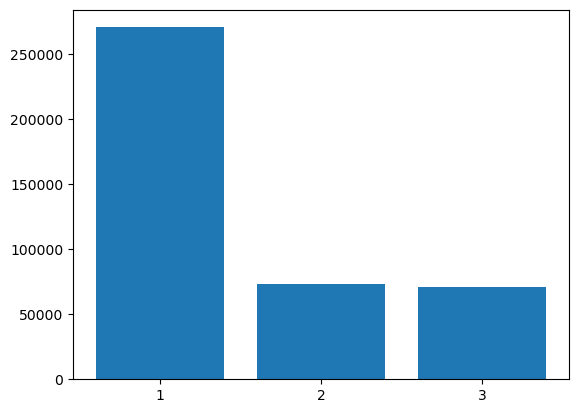

In [14]:
print(smoke['흡연상태'].value_counts()) #index, values

plt.bar(smoke['흡연상태'].value_counts().index, smoke['흡연상태'].value_counts().values)
plt.xticks([1,2,3]) #x축 값 설정
plt.show()

1-2. 중복데이터 확인

In [9]:
#기본키인 '가입자 일련번호'를 기준으로 중복확인
smoke.duplicated(subset='가입자 일련번호').sum()

0

1-3. 이상치 처리

In [10]:
smoke['식전혈당(공복혈당)']

2          91.0
5          90.0
6          83.0
8          98.0
9         142.0
          ...  
999992    121.0
999993     92.0
999995    106.0
999996     89.0
999998    110.0
Name: 식전혈당(공복혈당), Length: 415768, dtype: float64

- QQ Plot

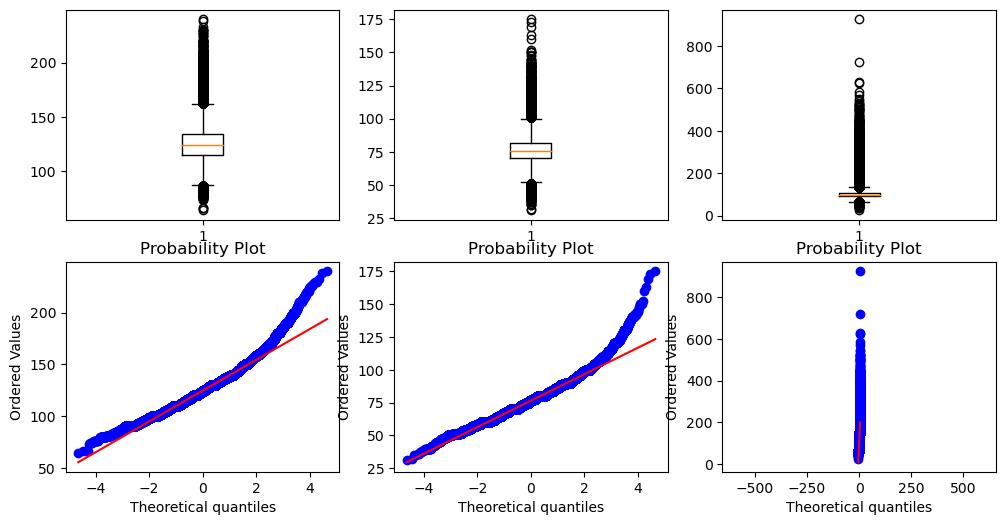

In [15]:
f, axes = plt.subplots(2, 3, figsize=(12, 6))
axes[0][0].boxplot(smoke['수축기 혈압'])
probplot(smoke['수축기 혈압'], plot=axes[1][0])

axes[0][1].boxplot(smoke['이완기 혈압'])
probplot(smoke['이완기 혈압'], plot=axes[1][1])

axes[0][2].boxplot(smoke['식전혈당(공복혈당)'])
probplot(smoke['식전혈당(공복혈당)'], plot=axes[1][2])

plt.axis("equal")
plt.show()

In [16]:
smoke['신장(5cm 단위)'].mean()

160.74703921417714

### 2. 상관계수 확인 (칼럼 간 연관성)

In [17]:
#콜레스테롤 칼럼들 간의 상관계수 확인 - 유사성
smoke_col = smoke.loc[:,'총 콜레스테롤': '콜레스테롤(LDL)']
smoke_col.corr()

,총 콜레스테롤,트리글리세라이드,콜레스테롤(HDL),콜레스테롤(LDL)
총 콜레스테롤,1.000000,0.190430,0.229217,0.929969
트리글리세라이드,0.190430,1.000000,-0.347563,0.019950
콜레스테롤(HDL),0.229217,-0.347563,1.000000,0.041837
콜레스테롤(LDL),0.929969,0.019950,0.041837,1.000000


총 콜레스테롤과 콜레스테롤(LDL)은 유사도 매우 높음

BUT, 둘 중에 하나만 가져오기에 다른 칼럼과의 연관성이 다르게 나타남
(일단 1개만 가져오기)
- 총 콜레스테롤, 트리글리세라이드, 콜레스테롤(HDL) 

In [18]:
#간 기능 칼럼들 간의 상관계수 확인 - 유사성
smoke_liver = smoke.loc[:,'간기능검사(AST)': '감마지티피']
smoke_liver.corr()

,간기능검사(AST),간기능검사(ALT),감마지티피
간기능검사(AST),1.000000,0.776154,0.315556
간기능검사(ALT),0.776154,1.000000,0.315900
감마지티피,0.315556,0.315900,1.000000


간기능검사(AST)와 간기능검사(ALT)의 유사도 매우 높음 (감마지티피와는 약한 연관성)
- 간기능검사(AST), 감마지티피

In [67]:
#흡연상태와 연관성 있어 보이는 것만 뽑기
#기준년도, 가입자 일련번호, 시도코드, 허리둘레, 시력, 청력, 콜레스테롤(LDL), 간기능검사(ALT), 구강검진수검여부 칼럼 제외
smoke2 = smoke.loc[:,['성별코드', '연령대코드(5세 단위)', '신장(5cm 단위)', '체중(5kg 단위)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤','트리글리세라이드', '콜레스테롤(HDL)', '혈색소', '요단백', '혈청크레아티닌', '간기능검사(AST)', '감마지티피', '음주여부','흡연상태']]

In [90]:
smoke2.describe()

,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,콜레스테롤(HDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),감마지티피,음주여부,흡연상태
count,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000
mean,1.525596,11.908030,160.747039,62.709997,124.646560,76.434524,103.560649,198.238433,122.979813,57.313204,14.112766,1.125106,0.835146,27.666285,35.778850,0.567215,1.520011
std,0.499345,2.293873,9.181011,12.428561,14.971359,10.132616,24.340232,42.832416,67.114856,16.929027,1.558423,0.495287,0.413048,20.579685,67.046252,0.495462,0.770005
min,1.000000,9.000000,130.000000,30.000000,64.000000,31.000000,26.000000,19.000000,1.000000,1.000000,1.000000,1.000000,0.080000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,10.000000,155.000000,55.000000,115.000000,70.000000,91.000000,169.000000,75.000000,47.000000,13.100000,1.000000,0.700000,20.000000,16.000000,0.000000,1.000000
50%,2.000000,12.000000,160.000000,60.000000,124.000000,76.000000,98.000000,197.000000,106.000000,55.000000,14.100000,1.000000,0.800000,24.000000,23.000000,1.000000,1.000000
75%,2.000000,13.000000,165.000000,70.000000,134.000000,82.000000,109.000000,225.000000,153.000000,66.000000,15.200000,1.000000,1.000000,30.000000,38.000000,1.000000,2.000000
max,2.000000,18.000000,195.000000,135.000000,240.000000,175.000000,925.000000,2406.000000,399.000000,1020.000000,25.000000,6.000000,85.000000,4876.000000,9999.000000,1.000000,3.000000


In [62]:
smoke2.corr()

,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,콜레스테롤(HDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),감마지티피,음주여부,흡연상태
성별코드,1.000000,0.032782,-0.712657,-0.549739,-0.112322,-0.168967,-0.124674,0.082369,-0.216643,0.267189,-0.607254,-0.041943,-0.291931,-0.079574,-0.168361,-0.300498,-0.585644
연령대코드(5세 단위),0.032782,1.000000,-0.358654,-0.218046,0.257374,-0.019285,0.142595,-0.197489,-0.034413,-0.088289,-0.132760,0.025061,0.051665,0.046851,-0.032895,-0.336835,-0.142301
신장(5cm 단위),-0.712657,-0.358654,1.000000,0.650910,-0.013328,0.125576,0.043418,0.000332,0.160464,-0.163073,0.478929,0.020633,0.199654,0.027909,0.115094,0.344493,0.464875
체중(5kg 단위),-0.549739,-0.218046,0.650910,1.000000,0.188875,0.257521,0.152736,-0.012438,0.312735,-0.295812,0.450341,0.047033,0.172342,0.093393,0.141687,0.238896,0.345976
수축기 혈압,-0.112322,0.257374,-0.013328,0.188875,1.000000,0.690698,0.155777,-0.017418,0.153545,-0.081597,0.115959,0.062064,0.047618,0.064304,0.077957,-0.039068,0.023742
이완기 혈압,-0.168967,-0.019285,0.125576,0.257521,0.690698,1.000000,0.093801,0.082307,0.185096,-0.053923,0.247572,0.041753,0.042668,0.066928,0.101358,0.087419,0.099653
식전혈당(공복혈당),-0.124674,0.142595,0.043418,0.152736,0.155777,0.093801,1.000000,-0.087105,0.183725,-0.117677,0.116775,0.113740,0.056299,0.067850,0.109844,-0.003397,0.084923
총 콜레스테롤,0.082369,-0.197489,0.000332,-0.012438,-0.017418,0.082307,-0.087105,1.000000,0.190430,0.229217,0.115023,-0.026509,-0.040694,-0.002929,0.025467,0.072819,-0.016568
트리글리세라이드,-0.216643,-0.034413,0.160464,0.312735,0.153545,0.185096,0.183725,0.190430,1.000000,-0.347563,0.259518,0.047474,0.077399,0.080141,0.176472,0.078455,0.217795
콜레스테롤(HDL),0.267189,-0.088289,-0.163073,-0.295812,-0.081597,-0.053923,-0.117677,0.229217,-0.347563,1.000000,-0.161527,-0.028528,-0.107693,-0.017762,-0.021657,0.039045,-0.163933


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


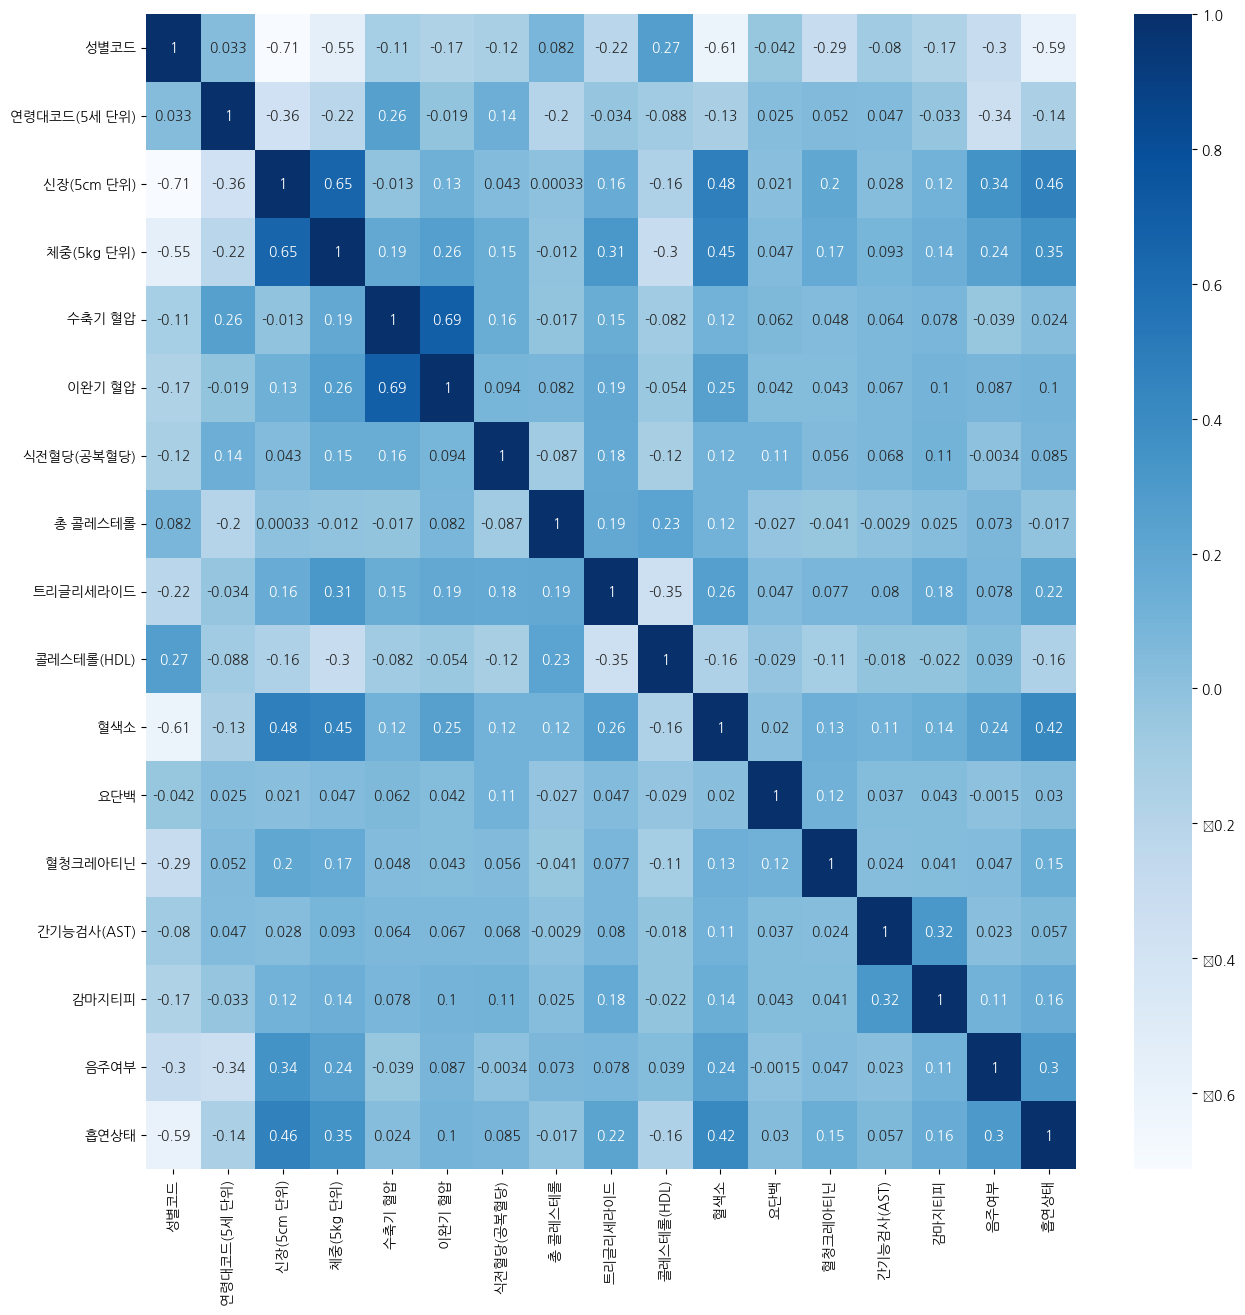

In [63]:
plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(smoke2.corr(), annot = True, cmap = 'Blues')
plt.show()

- 흡연상태와 연관된 칼럼 (절댓값 0.3이상만)
    - 성별코드 (-0.59)
    - 신장 (0.46)
    - 체중 (0.34)
    - 혈색소 (0.41)
    - 음주여부 (0.3)


In [33]:
smoke2.loc[:,['흡연상태', '성별코드', '신장(5cm 단위)', '체중(5kg 단위)', '혈색소', '음주여부']].corr()

,흡연상태,성별코드,신장(5cm 단위),체중(5kg 단위),혈색소,음주여부
흡연상태,1.000000,-0.585644,0.464875,0.345976,0.416625,0.297700
성별코드,-0.585644,1.000000,-0.712657,-0.549739,-0.607254,-0.300498
신장(5cm 단위),0.464875,-0.712657,1.000000,0.650910,0.478929,0.344493
체중(5kg 단위),0.345976,-0.549739,0.650910,1.000000,0.450341,0.238896
혈색소,0.416625,-0.607254,0.478929,0.450341,1.000000,0.238977
음주여부,0.297700,-0.300498,0.344493,0.238896,0.238977,1.000000


- 성별과 신장(-0.71), 성별과 체중(-0.55), 성별과 혈색소(-0.61), 성별과 음주여부(-0.3)
- 신장과 체중(0.65), 신장과 혈색소(0.48), 신장과 음주여부(0.34)
- 체중과 혈색소(0.45)

칼럼 별 상관성이 매우 많이 보임 (복잡하게 얽혀있음)

### 3. EDA

In [22]:
#글씨체 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'

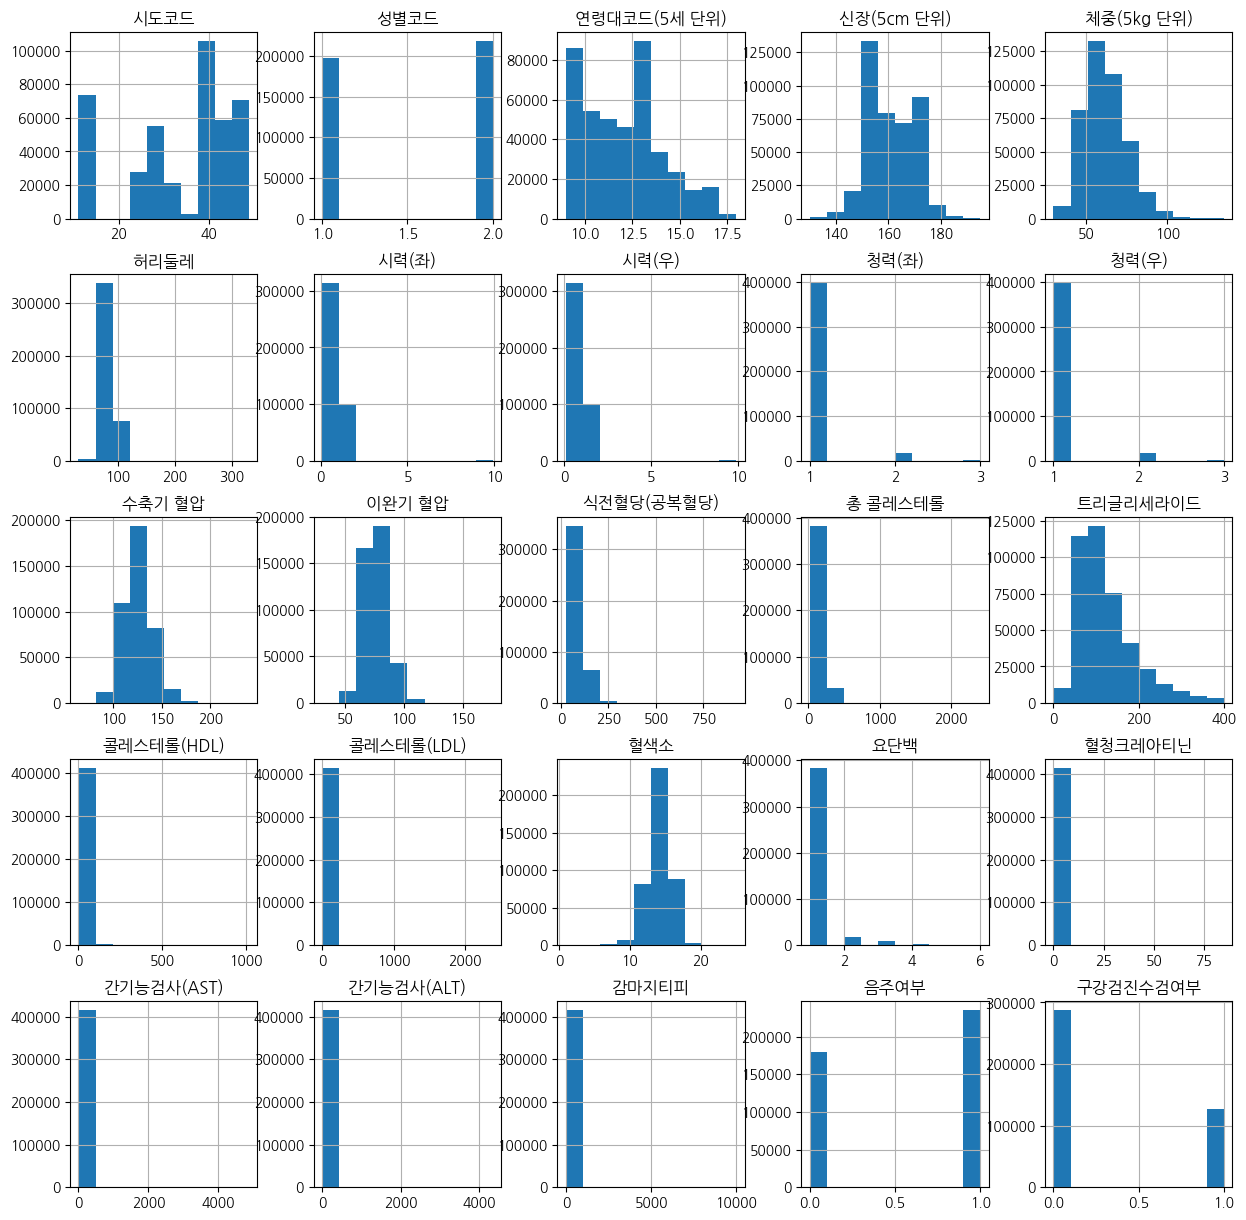

In [30]:
#피처 분포 확인
except_target = smoke.drop(['기준년도','가입자 일련번호','흡연상태'], axis = 1)
except_target.hist(figsize = (15,15))
plt.show()

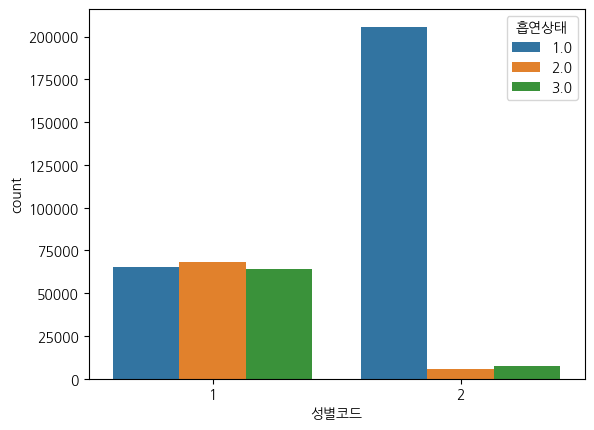

In [37]:
#성별코드 별 흡연상태 확인
sns.countplot(x ='성별코드', hue = '흡연상태', data = smoke)
plt.show()

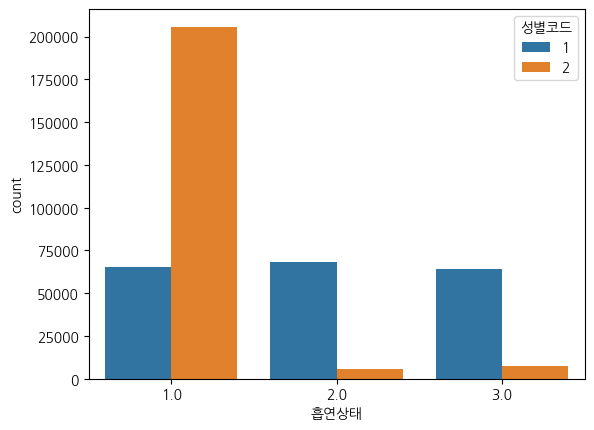

In [38]:
#흡연상태 별 성별코드 확인
sns.countplot(x ='흡연상태', hue = '성별코드', data = smoke)
plt.show()

- 남성의 경우, 흡연상태 1,2,3 개수가 비슷하게 나옴
- 여성의 경우, 피우지 않는 수가 압도적으로 높음
> 흡연상태 피우지 않음(여성이 엄청 높음) / 흡연상태 2,3 모두 남성이 높음

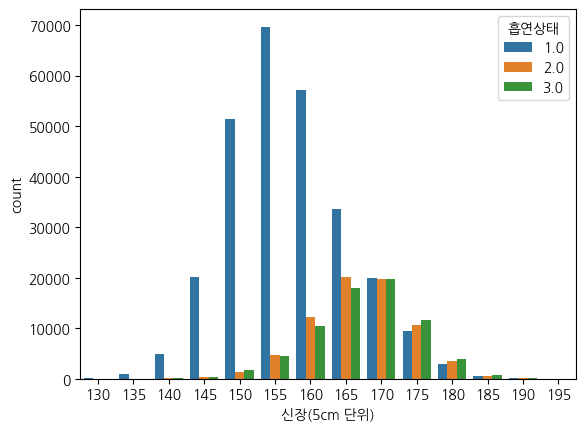

In [42]:
#신장 별 흡연상태 확인
sns.countplot(x ='신장(5cm 단위)', hue = '흡연상태', data = smoke)
plt.show()

- 145-165의 경우, 피우지 않는 수가 높음
- 160-180의 경우, 흡연상태 2와3도 높아졌다가 낮아짐
>성별과 신장은 강한 음의 상관관계(-0.71)로 남성의 경우, 신장이 높음

> 즉, 위의 경우에 보통 여성이 해당하고 아래 경우에 남성이 해당하기에 위와 같은 결과가 나옴

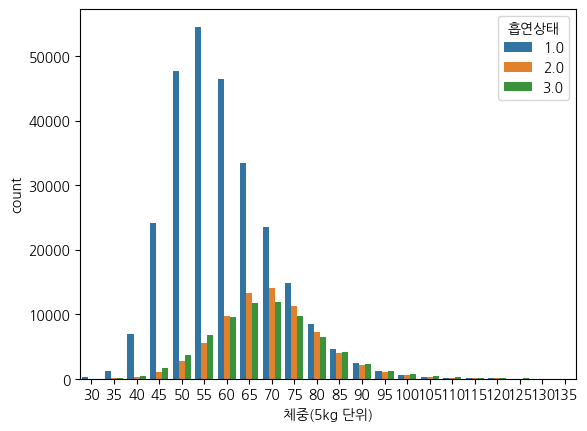

In [49]:
#체중 별 흡연상태 확인
sns.countplot(x ='체중(5kg 단위)', hue = '흡연상태', data = smoke)
plt.show()

성별, 신장과 섞여서 위와 비슷한 결과

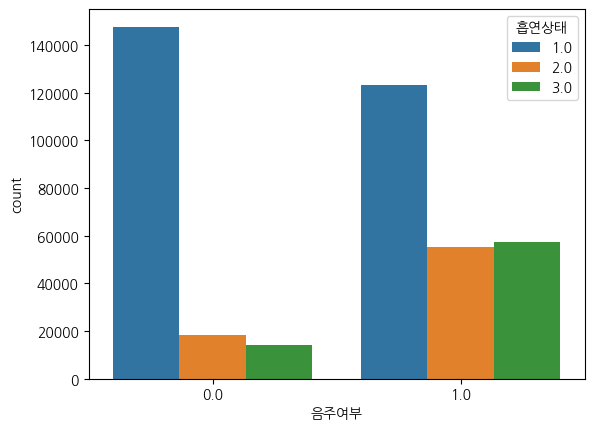

In [47]:
#음주여부 별 흡연상태 확인
sns.countplot(x ='음주여부', hue = '흡연상태', data = smoke)
plt.show()

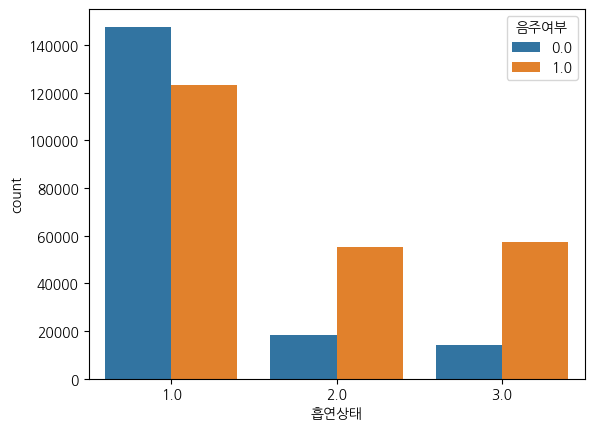

In [48]:
#흡연상태 별 음주여부 확인
sns.countplot(x ='흡연상태', hue = '음주여부', data = smoke)
plt.show()

- 흡연하지 않은 경우, 음주 안하는 경우가 높음 (둘 다 높긴한데)
- 흡연하는 경우, 음주를 하는 경우가 많음

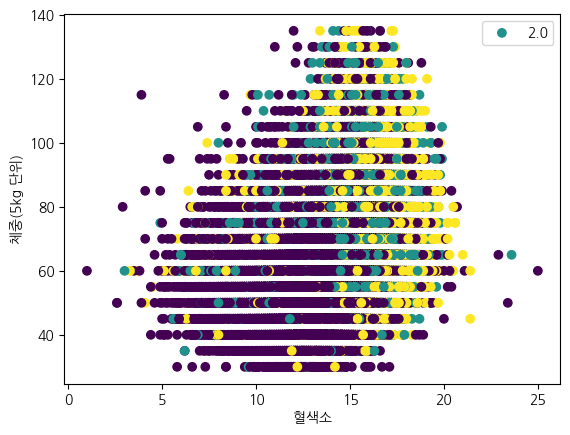

In [23]:
#산점도 - Outcome과 상관계수가 높은 칼럼 기준, 그와 상관계수가 높은 것과 연관지음
plt.scatter(smoke2['혈색소'],smoke2['체중(5kg 단위)'], c=smoke2['흡연상태'])

plt.xlabel('혈색소')
plt.ylabel('체중(5kg 단위)')
plt.legend(smoke2['흡연상태'])


### 4. 머신러닝

In [69]:
#train, test 분리(8:2)
split_count = int(smoke2.shape[0]*0.8)

train = smoke2[:split_count] 
test = smoke2[split_count:] 

In [78]:
#정답과 문제 칼럼 분리
feature_names = train.columns[:-1].tolist()
label_name = train.columns[-1]

In [79]:
#정답과 문제 데이터 분리
X_train = train[feature_names]
y_train = train[label_name]

print(X_train.shape)
print(y_train.shape) #둘의 행 일치해야

(332614, 16)
(332614,)


In [80]:
#실전 시험(정답, 문제) 데이터 분리
X_test = test[feature_names]
y_test = test[label_name]

print(X_test.shape)
print(y_test.shape) #둘의 행 일치해야

(83154, 16)
(83154,)


4-1. 의사결정나무 (Decision Tree)

In [81]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test) #예측

[0.27120636 0.02474198 0.02739543 0.03381122 0.061321   0.05545427
 0.06875866 0.07597108 0.07614486 0.06248443 0.06282681 0.00725731
 0.03503199 0.05780435 0.06577173 0.01401851]


<Axes: >

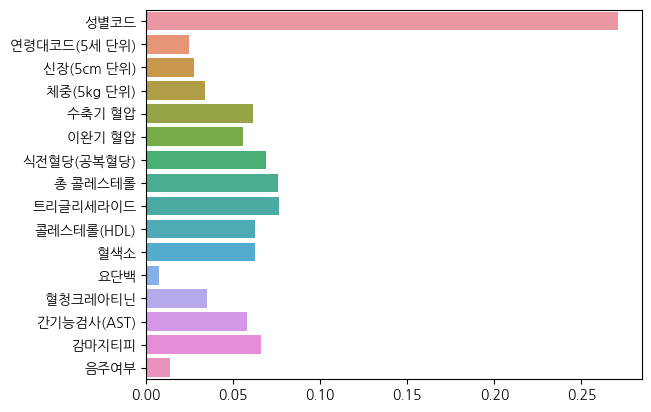

In [83]:
#피처의 중요도 추출
print(model.feature_importances_)
sns.barplot(x=model.feature_importances_, y=feature_names)

성별코드가 압도적으로 중요하게 작용

In [84]:
#정확도 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.6442865045578084